In [1]:
# modeling_exercises

# Exercises

1. Clustering with the Iris Dataset: Using this lesson as a guide, perform clustering on the iris dataset.

    a. Choose features other than the ones used in the lesson.
    b. Visualize the results of your clustering.
    c.Use the elbow method to visually select a good value for k.
    d. Repeat the clustering, this time with 3 different features.
    
2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

3. How does scaling impact the results of clustering?

    Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

In [47]:
# imports
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn import datasets

import viz
np.random.seed(4)

In [48]:
# load iris dataset
iris = datasets.load_iris()

# Since this is a bunch, create a dataframe
iris_df=pd.DataFrame(iris.data)
iris_df['class']=iris.target

iris_df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
iris_df.dropna(how="all", inplace=True) # remove any empty lines

In [49]:
iris_df.head() # check_yo_head

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [50]:
# taking 2 fields from the data
X = iris_df[['petal_len', 'sepal_len']]

In [51]:
# creating kmeans and fitting the data
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# using the object to make predictions
kmeans.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [52]:
# storing prediction back to dataframe
iris_df['cluster'] = kmeans.predict(X)

In [53]:
viz.

SyntaxError: invalid syntax (<ipython-input-53-5e1dda9073dc>, line 1)

In [54]:
# cluster_centers_: The center point of each cluster.
kmeans.cluster_centers_

array([[5.67804878, 6.83902439],
       [1.49215686, 5.00784314],
       [4.39310345, 5.87413793]])

In [55]:
# putting cluster_centers into a dataframe
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,petal_len,sepal_len
0,5.678049,6.839024
1,1.492157,5.007843
2,4.393103,5.874138


In [56]:
# using .groupby to do the same thing
iris_df.groupby('cluster')['petal_len', 'sepal_len'].mean()

,petal_len,sepal_len
cluster,,
0,5.678049,6.839024
1,1.492157,5.007843
2,4.393103,5.874138


Text(0.5, 1.0, 'Visualizing Cluster Centers')

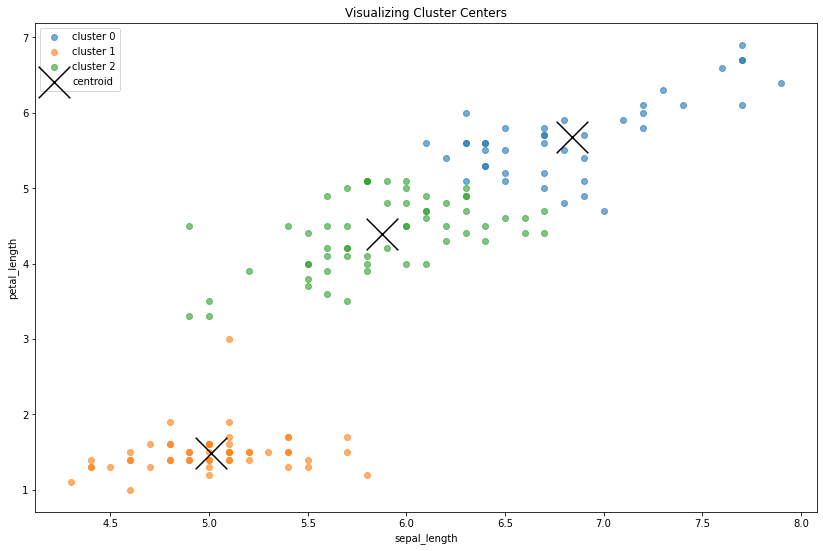

In [57]:
# visualize the cluster centers on top of our data too:
plt.figure(figsize=(14, 9))

for cluster, subset in iris_df.groupby('cluster'):
    plt.scatter(subset.sepal_len, subset.petal_len, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='petal_len', x='sepal_len', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.title('Visualizing Cluster Centers')

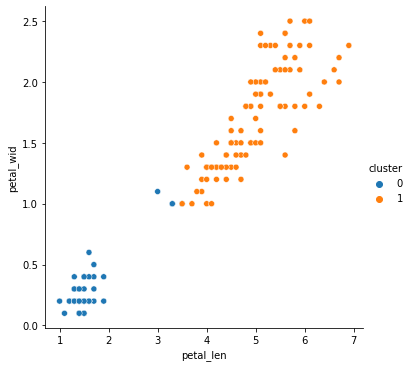

In [33]:
# exploring with different values of k: 2 clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
iris_df['cluster'] = kmeans.predict(X)

sns.relplot(data=iris_df, x='petal_len', y='petal_wid', hue='cluster')

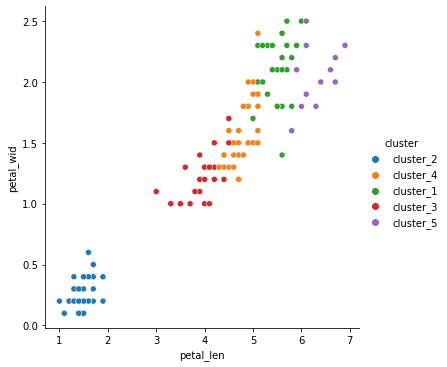

In [34]:
# exploring with different values of k: 5 clusters
kmeans = KMeans(n_clusters=5).fit(X)
iris_df['cluster'] = kmeans.predict(X)
iris_df.cluster = 'cluster_' + (iris_df.cluster + 1).astype('str')
sns.relplot(data=iris_df, x='petal_len', y='petal_wid', hue='cluster')

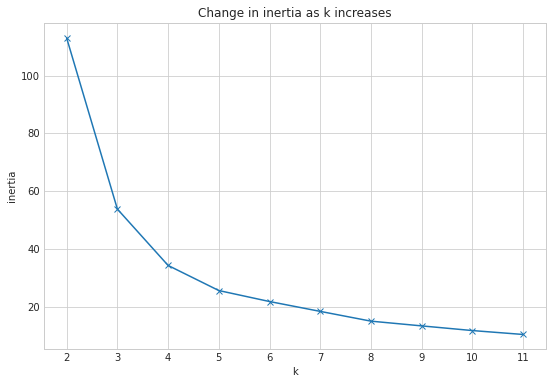

In [58]:
# choosing k with inertia: elbow method
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

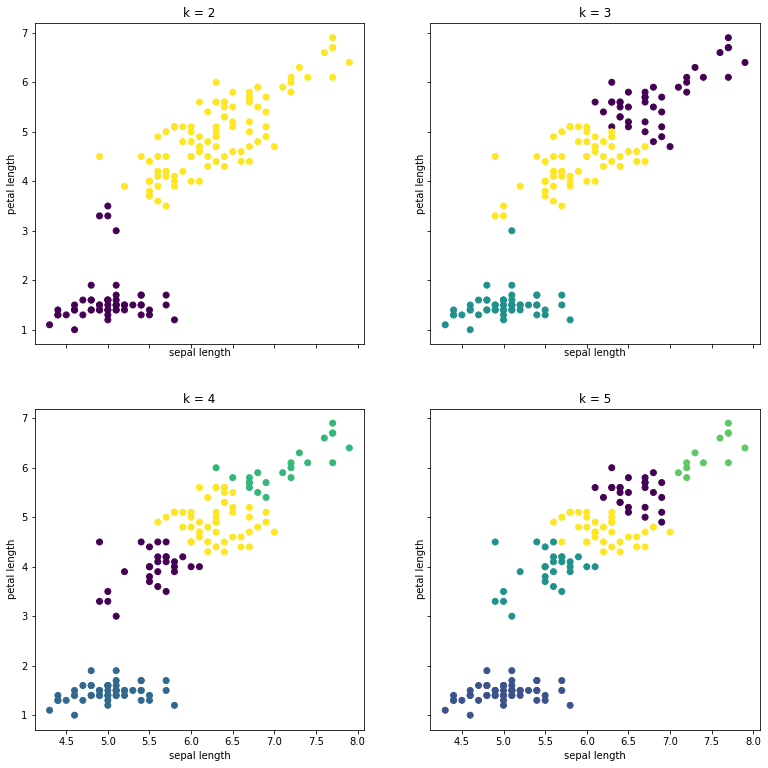

In [59]:
# visualize the clusters
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.sepal_len, X.petal_len, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal length', ylabel='petal length')

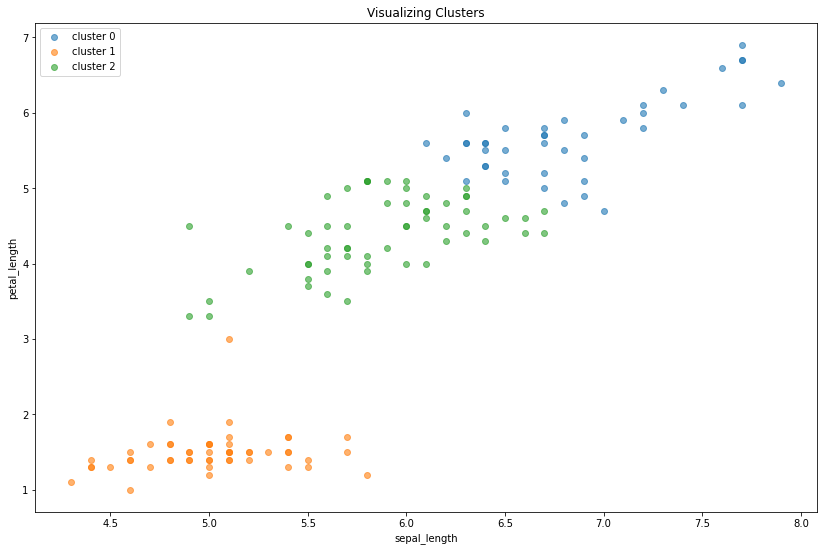

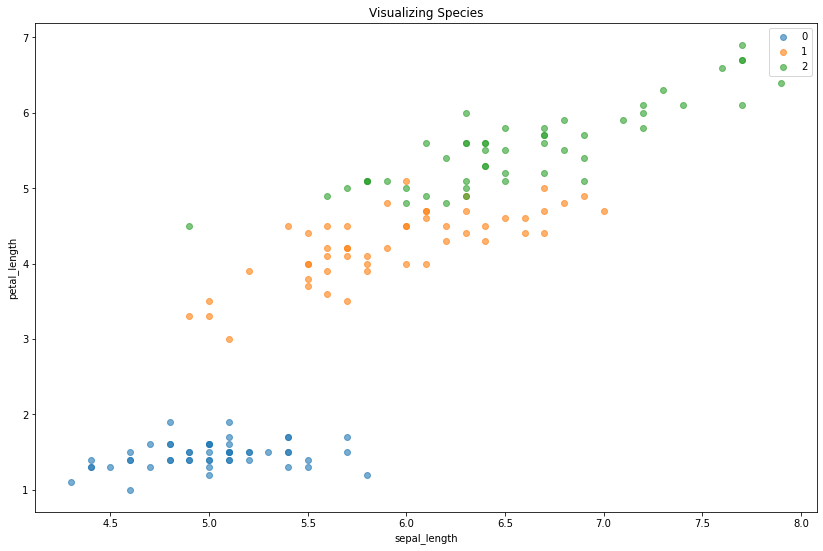

In [61]:
plt.figure(figsize=(14, 9))

for cluster, subset in iris_df.groupby('cluster'):
    plt.scatter(subset.sepal_len, subset.petal_len, label='cluster ' + str(cluster), alpha=.6, cmap='reds')
plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.title('Visualizing Clusters')
plt.show()


plt.figure(figsize=(14, 9))
for cluster, subset in iris_df.groupby('class'):
    plt.scatter(subset.sepal_len, subset.petal_len, label=str(cluster), alpha=.6)
# centroids.plot.scatter(y='petal_length', x='sepal_length', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.title('Visualizing Species')
plt.show()